In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT805/Assignment 2/Results/win_counter.csv', '\t')
d.columns = ['opening', 'wins']
d.loc[d.shape[0]] = ["queen\'s_pawn_game:_mason_attack", 14043.0]

In [3]:
d2 = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT805/Assignment 2/Results/opening_counter.csv', '\t')
d2.columns = ['id', 'count']
d2.loc[d2.shape[0]] = ["queen\'s_pawn_game:_morris_countergambit",42]

In [4]:
df = pd.merge(d, d2, left_on='opening', right_on='id', how='left').drop('id', axis=1)

In [5]:
df

,opening,wins,count
0,queen's_pawn_game:_morris_countergambit,25.0,42
1,queen's_pawn_game:_steinitz_countergambit,692.0,1477
2,queen's_pawn_game:_stonewall_attack,2186.0,4355
3,queen's_pawn_game:_symmetrical_variation,3741.0,7673
4,queen's_pawn_game:_symmetrical_variation__pseu...,2159.0,4459
...,...,...,...
2921,queen's_pawn_game:_levitsky_attack__euwe_varia...,17.0,40
2922,queen's_pawn_game:_levitsky_attack__welling_va...,31.0,61
2923,queen's_pawn_game:_liedmann_gambit,511.0,1128
2924,queen's_pawn_game:_london_system,5682.0,11442


In [6]:
df['win_rate'] = round(100*df['wins']/df['count'], 2)
x = df[df['count'] > 1000]

In [7]:
x = x.sort_values(by=['win_rate'],ascending=False).head(5)

In [8]:
x

,opening,wins,count,win_rate
2210,king's_pawn,6621.0,7084,93.46
406,italian_game:_two_knights_defense__fried_liver...,1884.0,2685,70.17
2219,king's_pawn_game:_damiano_defense,2388.0,3648,65.46
1874,queen's_gambit_accepted:_normal_variation,1508.0,2340,64.44
79,russian_game:_damiano_variation,998.0,1564,63.81


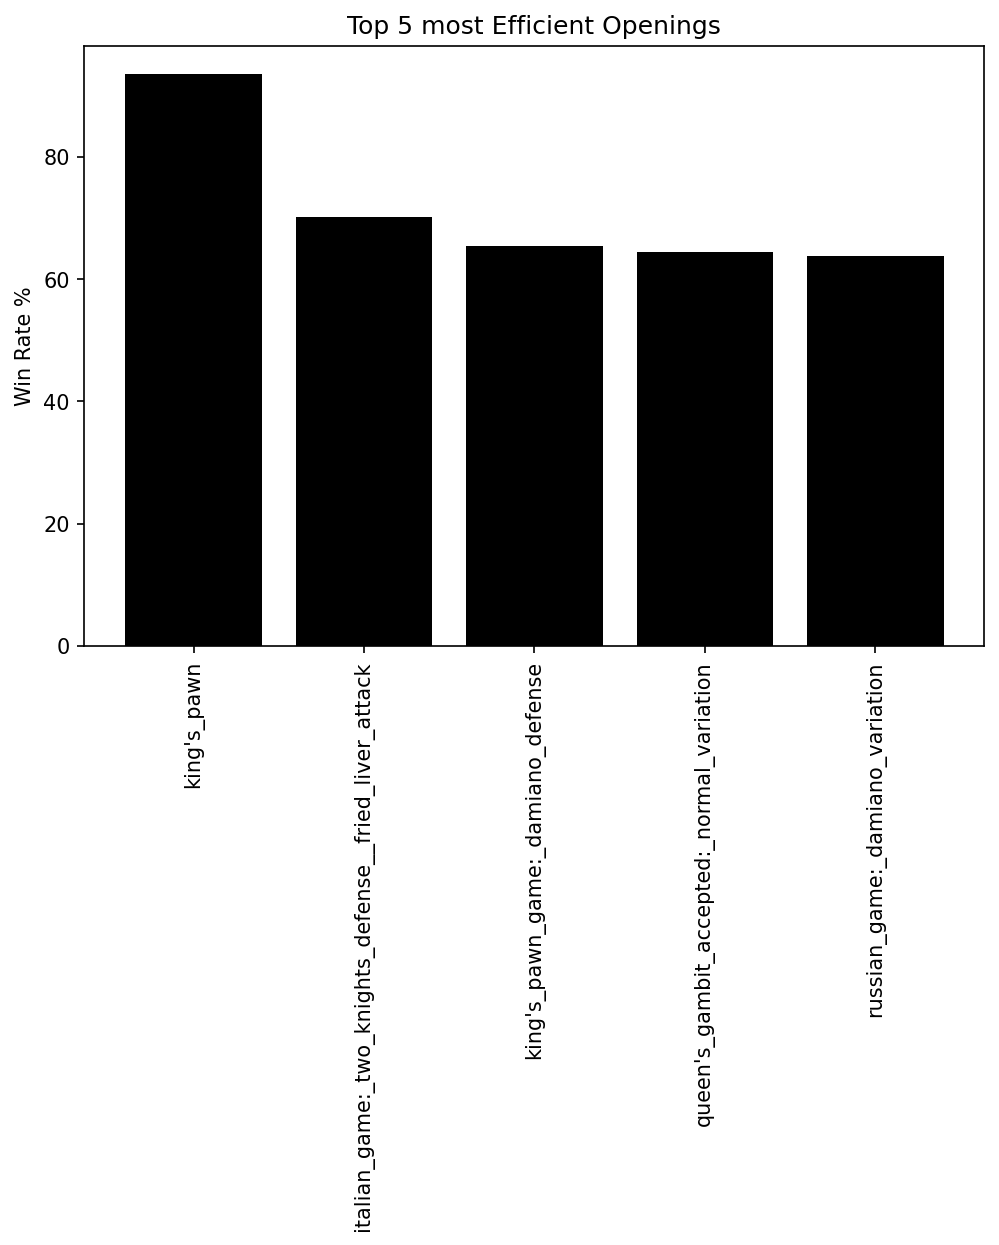

In [9]:
plt.rcParams['figure.dpi'] =150
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Opening = x['opening']
Win_rate = x['win_rate']
ax.bar(Opening,Win_rate, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Win Rate %')
plt.title('Top 5 most Efficient Openings')
plt.show()

In [15]:
d = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT805/Assignment 2/Results/event_counter.csv', '\t')
d.columns = ['event', 'count']
d.loc[d.shape[0]] = ['classical_tournament',130639]
d.head()

,event,count
0,correspondence,10179
1,bullet,911757
2,bullet_tournament,453341
3,classical,1030622
4,blitz_tournament,390312


In [41]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=d['event'], values=d['count'],hole=.3)])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"),
    legend=dict(orientation ="h")
)
